In [1]:
import fhirbase
import psycopg2
import numpy as np
import pandas as pd

import json

In [2]:
conn = psycopg2.connect(dbname='fb', user='postgres', password='postgres', host='localhost', port='5432')
fb = fhirbase.FHIRBase(conn)

In [3]:
def log(value):
    print(json.dumps(value, indent=4, sort_keys=True, default=str))

In [4]:
# Initialize your dataframe

COLUMNS = [
    "colonoscopy",
    "diarrhea",
    "bleeding",
    "recurrent_polyp",
    "polyp_size",
    "stool",
    "age",
    "cancer_stage"
]

indices = []

with fb.execute('SELECT p.id FROM patient p') as cursor:
    for i in cursor: 
        indices.append(i[0])

values = pd.DataFrame(0, index=indices, columns=COLUMNS)

values

,colonoscopy,diarrhea,bleeding,recurrent_polyp,polyp_size,stool,age,cancer_stage
8811b988-ee00-43af-98f2-e5cd40f8e1c8,0,0,0,0,0,0,0,0
309d570a-730f-4b43-b2f0-461bf2dd1728,0,0,0,0,0,0,0,0
0cb31f35-7549-462b-9879-8babca64d7dd,0,0,0,0,0,0,0,0
665f4806-e10d-47a1-b62d-dbb6e288c58f,0,0,0,0,0,0,0,0
1b9229cf-8018-4582-8ba5-b1ce702c54fb,0,0,0,0,0,0,0,0
b3033a17-4919-4fc3-ad57-5b95014e5908,0,0,0,0,0,0,0,0
227e39c1-dffc-4e61-a542-9047fbea0107,0,0,0,0,0,0,0,0
73a320ee-75ad-4b54-bbfa-de025de37984,0,0,0,0,0,0,0,0
c2fc6af3-8264-4997-a8ff-520f516263e7,0,0,0,0,0,0,0,0
09f78541-d7fe-4875-8a78-4e71220c89ff,0,0,0,0,0,0,0,0


In [15]:
colonoscopy_patient_query = '''
SELECT p.id
FROM patient p
JOIN procedure pr ON pr.resource#>>'{subject,id}' LIKE CONCAT('%',p.id)
WHERE (pr.resource @> '{"code": {"coding": [{"code": "73761001"}]}}'::jsonb)
'''

with fb.execute(colonoscopy_patient_query) as cursor:
    for item in cursor:
        values['colonoscopy'][item[0]] = values['colonoscopy'][item[0]] + 1

In [17]:
diarrhea_query = '''
SELECT p.id
FROM patient p
JOIN condition c ON c.resource#>>'{subject,id}' LIKE CONCAT('%',p.id)
WHERE (c.resource @> '{"code": {"coding": [{"code": "236077008"}]}}'::jsonb)
'''

with fb.execute(diarrhea_query) as cursor:
    for item in cursor:
        values['diarrhea'][item[0]] = values['diarrhea'][item[0]] + 1

In [18]:
bleeding_query = '''
SELECT p.id
FROM patient p
JOIN condition c ON c.resource#>>'{subject,id}' LIKE CONCAT('%',p.id)
WHERE (c.resource @> '{"code": {"coding": [{"code": "6072007"}]}}'::jsonb)
'''

with fb.execute(bleeding_query) as cursor:
    for item in cursor:
        values['bleeding'][item[0]] = values['bleeding'][item[0]] + 1

In [19]:
recurrent_polyp_query = '''
SELECT p.id
FROM patient p
JOIN condition c ON c.resource#>>'{subject,id}' LIKE CONCAT('%', p.id)
WHERE (c.resource @> '{"code": {"coding": [{"code": "713197008"}]}}'::jsonb)
'''

with fb.execute(recurrent_polyp_query) as cursor:
    for item in cursor:
        values['recurrent_polyp'][item[0]] = values['recurrent_polyp'][item[0]] + 1

In [9]:
polyp_size_query = '''
SELECT DISTINCT(p.id), o.resource#>'{value,Quantity,value}'
FROM patient p
JOIN observation o ON o.resource#>>'{subject,id}' LIKE CONCAT('%', p.id)
WHERE o.resource @> '{"code": {"coding": [{"code": "33756-8"}]}}'::jsonb
'''
# TODO: Optimize to do roll up in query

with fb.execute(polyp_size_query) as cursor:
    for item in cursor:
        current_size = values['polyp_size'][item[0]]
        if (item[1] > current_size):
            values["polyp_size"][item[0]] = item[1]

In [10]:
stool_query = '''
SELECT DISTINCT(p.id), o.resource#>'{value,Quantity,value}'
FROM patient p
JOIN observation o ON o.resource#>>'{subject,id}' LIKE CONCAT('%', p.id)
WHERE o.resource @> '{"code": {"coding": [{"code": "57905-2"}]}}'::jsonb
'''
# TODO: Optimize to do roll up in query

with fb.execute(stool_query) as cursor:
    for item in cursor:
        current_size = values['polyp_size'][item[0]]
        if (item[1] > current_size):
            values["stool"][item[0]] = item[1]

In [11]:
age_query = '''
SELECT DISTINCT(p.id), extract(year from age(now(), (p.resource->>'birthDate')::date))
FROM patient p
'''

with fb.execute(age_query) as cursor:
    for item in cursor:
        values["age"][item[0]] = item[1]

In [12]:
has_stage_1_query = '''
SELECT DISTINCT(p.id)
FROM patient p
JOIN condition c ON c.resource#>>'{subject,id}' LIKE CONCAT('%',p.id)
WHERE c.resource @> '{"code": {"coding": [{"code": "93761005"}]}}'::jsonb
'''

with fb.execute(has_stage_1_query) as cursor:
    for item in cursor:
        values['cancer_stage'][item[0]] = 1


has_stage_2_query = '''
SELECT DISTINCT(p.id)
FROM patient p
JOIN condition c ON c.resource#>>'{subject,id}' LIKE CONCAT('%',p.id)
WHERE c.resource @> '{"code": {"coding": [{"code": "109838007"}]}}'::jsonb
'''

with fb.execute(has_stage_2_query) as cursor:
    for item in cursor:
        values['cancer_stage'][item[0]] = 2


has_stage_3_query = '''
SELECT DISTINCT(p.id)
FROM patient p
JOIN condition c ON c.resource#>>'{subject,id}' LIKE CONCAT('%',p.id)
WHERE c.resource @> '{"code": {"coding": [{"code": "363406005"}]}}'::jsonb
'''

with fb.execute(has_stage_3_query) as cursor:
    for item in cursor:
        values['cancer_stage'][item[0]] = 3


has_stage_4_query = '''
SELECT DISTINCT(p.id)
FROM patient p
JOIN condition c ON c.resource#>>'{subject,id}' LIKE CONCAT('%',p.id)
WHERE c.resource @> '{"code": {"coding": [{"code": "94260004"}]}}'::jsonb
'''

with fb.execute(has_stage_4_query) as cursor:
    for item in cursor:
        values['cancer_stage'][item[0]] = 4
        

In [16]:
print(len(values[values['cancer_stage'] == 0]))
print(len(values[values['cancer_stage'] == 1]))
print(len(values[values['cancer_stage'] == 2]))
print(len(values[values['cancer_stage'] == 3]))
print(len(values[values['cancer_stage'] == 4]))
print(np.unique(values["colonoscopy"]))

10471
36
84
302
358
[0 2 3 4 5 6]


In [20]:
values

,colonoscopy,diarrhea,bleeding,recurrent_polyp,polyp_size,stool,age,cancer_stage
8811b988-ee00-43af-98f2-e5cd40f8e1c8,0,0,0,0,0,0,49,0
309d570a-730f-4b43-b2f0-461bf2dd1728,0,0,0,0,0,0,10,0
0cb31f35-7549-462b-9879-8babca64d7dd,2,0,0,0,0,0,52,0
665f4806-e10d-47a1-b62d-dbb6e288c58f,0,0,0,0,0,0,5,0
1b9229cf-8018-4582-8ba5-b1ce702c54fb,0,0,0,0,0,0,16,0
b3033a17-4919-4fc3-ad57-5b95014e5908,0,0,0,0,0,0,16,0
227e39c1-dffc-4e61-a542-9047fbea0107,0,0,0,0,0,0,24,0
73a320ee-75ad-4b54-bbfa-de025de37984,2,2,2,0,0,0,46,4
c2fc6af3-8264-4997-a8ff-520f516263e7,3,0,0,0,0,0,69,0
09f78541-d7fe-4875-8a78-4e71220c89ff,0,0,0,0,0,0,32,0


In [21]:
from sklearn.cross_validation import train_test_split

X = values.loc[:, :'age'].reset_index(drop=True).values
y = values.loc[:, 'cancer_stage'].reset_index(drop=True).values

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8438, 7) (2813, 7) (8438,) (2813,)


/Users/castilt5/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9569854248133665

In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9562744400995379

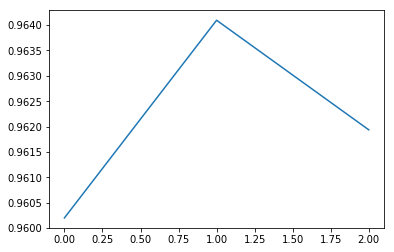

In [24]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

scores = cross_val_score(logreg, X_train, y_train)

plt.plot(scores)

In [284]:
y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9559189477426235

In [25]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9555634553857092

In [26]:
import pickle

with open("model.pickle", "wb") as pickle_file:
    pickle_string = pickle.dumps(logreg)
    pickle_file.write(pickle_string)

In [27]:
with open("model.pickle", "rb") as pickle_file:
    logreg2 = pickle.loads(pickle_file.read())

y_pred = logreg2.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9562744400995379